In [ ]:
import geopandas as gpd
import plotly.express as px
import numpy as np

# Load GeoDataFrame of US airports
geo_file = '../db/us-airports/us-airports.gpkg'
gdf_airports = gpd.read_file(geo_file)

# Keep only Point geometries
gdf_airports = gdf_airports[gdf_airports.geometry.type == 'Point']

# Add ED values (random for example; replace with real values if needed)
np.random.seed(42)  # for reproducibility
gdf_airports["ED"] = np.random.rand(len(gdf_airports))

# Use index as a unique ID
gdf_airports["id"] = gdf_airports.index.astype(str)

# Plot using scatter_mapbox with color based on ED
fig = px.scatter_mapbox(
    gdf_airports,
    lat=gdf_airports.geometry.y,
    lon=gdf_airports.geometry.x,
    color="ED",
    color_continuous_scale="Viridis",  # Or "Jet", "Plasma", etc.
    hover_name="FULLNAME",
    hover_data=["LOCID", "ED"] if "LOCID" in gdf_airports.columns else ["ED"],
    zoom=3,
    center={"lat": 39.8283, "lon": -98.5795},  # Center of the US
    mapbox_style="carto-positron",
    height=600
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), paper_bgcolor="White")
fig.write_html("us_airports_map.html")

In [ ]:
import pandas as pd

parquet = '../db/taxis/yellow_tripdata_2012-01.parquet'

print("Start time ")

# Load Parquet file
taxis_df = pd.read_parquet(parquet, engine="pyarrow")

# Rename columns
taxis_df = taxis_df.rename(columns={
    "trip_distance": "Distance",
    "fare_amount": "Price"  # fix typo if needed
})

# Ensure datetime columns are datetime objects
taxis_df["tpep_pickup_datetime"] = pd.to_datetime(taxis_df["tpep_pickup_datetime"])
taxis_df["tpep_dropoff_datetime"] = pd.to_datetime(taxis_df["tpep_dropoff_datetime"])

# Create "Total Time" in minutes
taxis_df["Total Time"] = (taxis_df["tpep_dropoff_datetime"] - taxis_df["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Split pickup datetime into date and HHMM time
taxis_df["Pickup Date"] = taxis_df["tpep_pickup_datetime"].dt.date.astype(str)
taxis_df["Pickup Time"] = taxis_df["tpep_pickup_datetime"].dt.strftime("%H%M")

# Save to JSON file
taxis_df.to_json("../db/taxis/yellow_tripdata_2012-01.json", orient="records", date_format="iso")


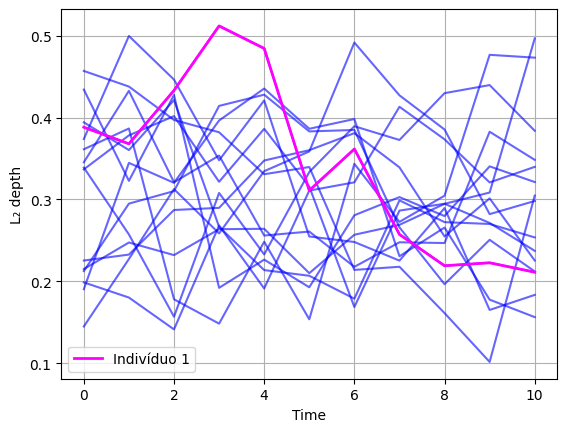

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulando profundidades para 15 indivíduos
np.random.seed(0)
time = np.arange(0, 11)
depths = [0.3 + 0.1 * np.sin(time / 2 + i) + 0.05 * np.random.randn(len(time)) for i in range(15)]

for d in depths:
    plt.plot(time, d, color='blue', alpha=0.6)

# Um indivíduo destacado
plt.plot(time, depths[0], color='magenta', label='Indivíduo 1', linewidth=2)

plt.xlabel('Time')
plt.ylabel('L₂ depth')
plt.legend()
plt.grid(True)
plt.show()